<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>


# <!-- TITLE --> [BHP1] - Regression with a Dense Network (DNN)
<!-- DESC --> A Simple regression with a Dense Neural Network (DNN) - BHPD dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Predicts **housing prices** from a set of house features. 
 - Understanding the **principle** and the **architecture** of a regression with a **dense neural network**  


The **[Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os,sys

sys.path.append('..')
import fidle.pwk as ooo

place, datasets_dir = ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.57 DEV
Run time             : Monday 14 September 2020, 08:57:10
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Current place        : Fidle at IDRIS
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Update keras cache   : Done


## Step 2 - Retrieve data

### 2.1 - Option 1  : From Keras
Boston housing is a famous historic dataset, so we can get it directly from [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  

In [2]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(test_split=0.2, seed=113)

### 2.2 - Option 2 : From a csv file
More fun !

In [3]:
data = pd.read_csv(f'{datasets_dir}/BHPD/origine/BostonHousing.csv', header=0)

display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


Missing Data :  0   Shape is :  (506, 14)


## Step 3 - Preparing the data
### 3.1 - Split data
We will use 70% of the data for training and 30% for validation.  
The dataset is **shuffled** and shared between **learning** and **testing**.  
x will be input data and y the expected output

In [4]:
# ---- Suffle and Split => train, test
#
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv']
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']

print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)

Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [5]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.74,10.51,11.22,0.06,0.56,6.29,69.82,3.72,9.62,407.45,18.46,353.89,12.75
std,8.87,22.27,6.75,0.25,0.11,0.72,27.50,2.00,8.71,167.90,2.19,95.77,7.23
min,0.01,0.00,1.21,0.00,0.39,3.56,2.90,1.17,1.00,188.00,12.60,2.52,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.90,47.25,2.09,4.00,279.00,17.40,374.83,6.86
50%,0.29,0.00,9.79,0.00,0.54,6.20,79.50,3.16,5.00,330.00,19.05,391.96,11.49
75%,3.69,12.50,18.10,0.00,0.62,6.63,94.05,4.98,24.00,666.00,20.20,396.32,17.10
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,36.98


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.47,-1.48,-0.26,-1.48,-3.80,-2.43,-1.28,-0.99,-1.31,-2.68,-3.67,-1.52
25%,-0.41,-0.47,-0.89,-0.26,-0.91,-0.54,-0.82,-0.82,-0.65,-0.77,-0.48,0.22,-0.81
50%,-0.39,-0.47,-0.21,-0.26,-0.16,-0.12,0.35,-0.28,-0.53,-0.46,0.27,0.40,-0.17
75%,-0.01,0.09,1.02,-0.26,0.60,0.48,0.88,0.63,1.65,1.54,0.80,0.44,0.60
max,9.60,4.02,2.45,3.79,2.79,3.48,1.10,3.49,1.65,1.81,1.62,0.45,3.35


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
256,-0.42,3.57,-1.11,-0.26,-1.44,1.63,-1.30,1.31,-0.76,-0.97,-1.17,0.34,-1.33
124,-0.41,-0.47,2.14,-0.26,0.22,-0.57,0.94,-0.86,-0.88,-1.31,0.29,0.27,0.67
268,-0.36,0.43,-1.07,-0.26,0.17,1.65,-0.63,-0.43,-0.53,-0.85,-2.50,0.38,-1.33
489,-0.40,-0.47,2.45,-0.26,0.47,-1.21,1.04,-0.98,-0.65,1.81,0.75,-0.10,1.55
332,-0.42,1.10,-0.76,-0.26,-1.05,-0.35,-1.69,1.46,-0.99,-0.62,-0.71,0.09,-0.68


## Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
  def get_model_v1(shape):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'rmsprop',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [7]:
model=get_model_v1( (13,) )

model.summary()

img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
display(img)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 64)                896       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


None

### 5.2 - Train it

In [8]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 100,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test))

Epoch 1/100
36/36 [==============================] - 0s 9ms/step - loss: 503.0777 - mae: 20.2737 - mse: 503.0777 - val_loss: 393.9827 - val_mae: 17.6556 - val_mse: 393.9827
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 279.2001 - mae: 14.1952 - mse: 279.2001 - val_loss: 149.7944 - val_mae: 9.8029 - val_mse: 149.7944
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 92.0400 - mae: 7.3086 - mse: 92.0400 - val_loss: 56.1463 - val_mae: 5.1862 - val_mse: 56.1463
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 40.7789 - mae: 4.5229 - mse: 40.7789 - val_loss: 39.5256 - val_mae: 4.1634 - val_mse: 39.5256
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 29.7879 - mae: 3.8496 - mse: 29.7879 - val_loss: 31.2629 - val_mae: 3.6489 - val_mse: 31.2629
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 24.4654 - mae: 3.5160 - mse: 24.4654 - val_loss: 26.0581 - val_mae: 3.4063 - val_

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

x_test / loss      : 9.6605
x_test / mae       : 2.1656
x_test / mse       : 9.6605


### 6.2 - Training history
What was the best result during our training ?

In [10]:

df=pd.DataFrame(data=history.history)
df.describe()

,loss,mae,mse,val_loss,val_mae,val_mse
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,17.502493,2.361973,17.502493,19.327123,2.742917,19.327123
std,56.817240,2.297174,56.817240,40.660030,1.724474,40.660030
min,4.673726,1.507414,4.673726,9.464625,2.130583,9.464625
25%,6.021543,1.687790,6.021543,11.342185,2.299006,11.342185
50%,7.579046,1.885187,7.579046,12.440843,2.369379,12.440843
75%,10.411116,2.150775,10.411116,14.812038,2.647739,14.812038
max,503.077698,20.273706,503.077698,393.982666,17.655603,393.982666


In [11]:
print("min( val_mae ) : {:.4f}".format( min(history.history["val_mae"]) ) )

min( val_mae ) : 2.1306


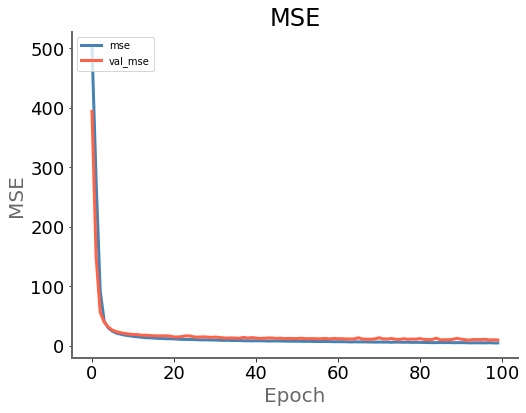

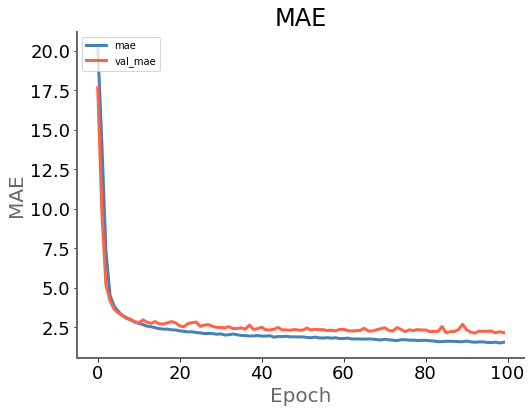

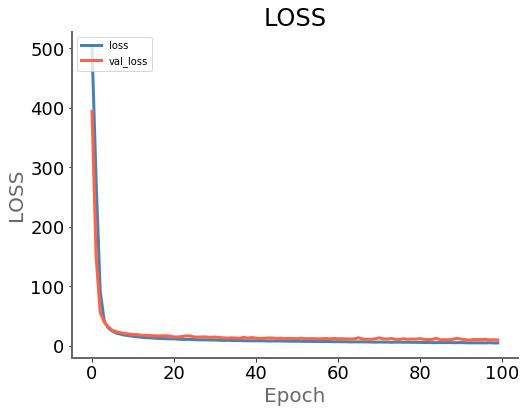

In [12]:
ooo.plot_history(history, plot={'MSE' :['mse', 'val_mse'],
                                'MAE' :['mae', 'val_mae'],
                                'LOSS':['loss','val_loss']})

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [13]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]
real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [ ]:

predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 9.46 K$
Reality    : 10.40 K$


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>